# Setting up notebook:

In [ ]:
# Libraries:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import folium
import requests
import plotly.express as px
import sys
sys.setrecursionlimit(2000)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Database Cleaning:

In [ ]:
#API_KEY = ''
direccion = 'Palo Alto, CA'
params = {'key':API_KEY, 
          'address': direccion
          }
base_url = 'https://maps.googleapis.com/maps/api/geocode/json?'
response = requests.get(base_url, params = params)

In [ ]:
# opening file:
df_original = pd.read_excel('/content/DAVID BASE DE DATOS SUMERHILL.xlsx')
df_original.columns

Index(['Curso', 'ESTUDIANTE ', 'DIRECCION', 'BARRIO', 'RUTA', 'CIUDAD',
       'CAMBIOS ', 'PADRE', 'CEL/PADRE', 'MADRE', 'CEL/MADRE', 'VALOR '],
      dtype='object')

In [ ]:
# file description:
df_original.describe(include='all')

,Curso,ESTUDIANTE,DIRECCION,BARRIO,RUTA,CIUDAD,CAMBIOS,PADRE,CEL/PADRE,MADRE,CEL/MADRE,VALOR
count,1468,1469,1469,1442,1469.0,1469,5,1449,1390,1465,1462,1469.000000
unique,120,1469,1337,582,96.0,9,4,1320,1199,1343,1270,NaN
top,09G,FLOREZ VILLAFAÑE ISAAC,CLLE 12 # 25 90 CASA 36,GRAN GRANADA,79.0,BOGOTA,57( AGOSTO 13),,,PUENTES REYES YUDI YADIRA,3002184934,NaN
freq,26,1,3,122,34.0,1228,2,17,4,3,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.874745
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.828725
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318.000000


In [ ]:
# checking for repeated students:
df_original['ESTUDIANTE '].value_counts().max()

1

In [ ]:
# checking for RUTA strange values:
pd.DataFrame(df_original['RUTA'].value_counts()).tail(10)

,RUTA
66,11
19,11
39,10
90,6
4*3,1
39*34,1
9*16,1
41*56,1
65*55,1
17*2,1


In [ ]:
# creating a copy to work on:
df = df_original.copy()
# droping unnecesary columns:
df.drop(['CAMBIOS ','PADRE', 'CEL/PADRE', 'MADRE', 'CEL/MADRE', 'VALOR '], inplace =True, axis=1)
# renaming columns:
df.columns = ['Curso', 'ESTUDIANTE', 'DIRECCION', 'BARRIO', 'RUTA', 'CIUDAD']

In [ ]:
# cleaning RUTA values:
for i in range(0,1469):
  try:
    df['RUTA'][i] = int(df['RUTA'][i])
  except:
    df['RUTA'][i] = int(df['RUTA'][i].partition('*')[0])

In [ ]:
# ordering df by RUTA number:
df = df.sort_values(by='RUTA', ascending=True)
# creating a new column to group by RUTA number:
df['Num_Ruta'] = 'Ruta_' + df['RUTA'].astype(str)
# creating subsets of dataframe from RUTA values:
lista_de_rutas = df['Num_Ruta'].unique()

In [ ]:
# removing double and triple spaces:
df = df.replace('\s+', ' ', regex=True)
df = df.replace('\s+', '  ', regex=True)

In [ ]:
# number of unique addresses
len(df.DIRECCION), len(df.DIRECCION.unique())

(1469, 1334)

In [ ]:
df

,Curso,ESTUDIANTE,DIRECCION,BARRIO,RUTA,CIUDAD,Num_Ruta
0,KIB,MORALES CRUZ AMY LUCIANA,CLLE 116 B # 80 51 TO 4 APTO 201,CORTIJO,1,BOGOTA,Ruta_1
32,09C,GRANDAS GUTIERREZ LAURA CATALINA,CRA 119 # 80 22 INT 1 APTO 101,CORTIJO,1,BOGOTA,Ruta_1
31,03D,GONZALEZ REYES VICTORIA,CRA 119 # 80 22 INT 4 APT 404,EL CORTIJO,1,BOGOTA,Ruta_1
30,07M,ROJAS TINOCO ISABELLA,CRA 118 # 80 A 65 CASA 26,RECREO DEL CORTIJO,1,BOGOTA,Ruta_1
29,03H,OROZCO BELTRÁN LUCIANA,CRA 116 B # 80 51 INT. 16 APTO 301,EL CORTIJO,1,BOGOTA,Ruta_1
...,...,...,...,...,...,...,...
1459,09A,TALERO LOPEZ ESTEBAN,CRA 7 # 6 49 CASA S 4,TENJO,90,TENJO,Ruta_90
1460,04E,MORA ARDILA SARA GABRIELA,TENJO,TENJO,90,TENJO,Ruta_90
1461,03A,BUITRAGO PEDROZA JUAN JOSE,TENJO,TENJO,90,TENJO,Ruta_90
1462,07I,MORA ARDILA ANA VALERIA,TENJO,TENJO,90,TENJO,Ruta_90


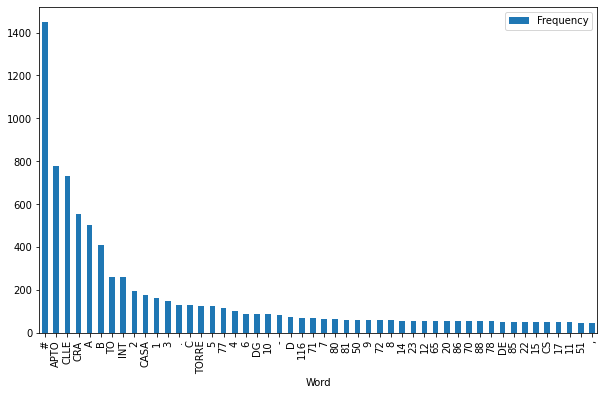

In [ ]:
# finding the50 most frequent words in DIRECCION:
a = df['DIRECCION'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
top_50_most_frequent = pd.DataFrame(word_dist.most_common()[:50],columns=['Word', 'Frequency'])
top_50_most_frequent.plot(kind='bar', x = 'Word', figsize = (10,6))

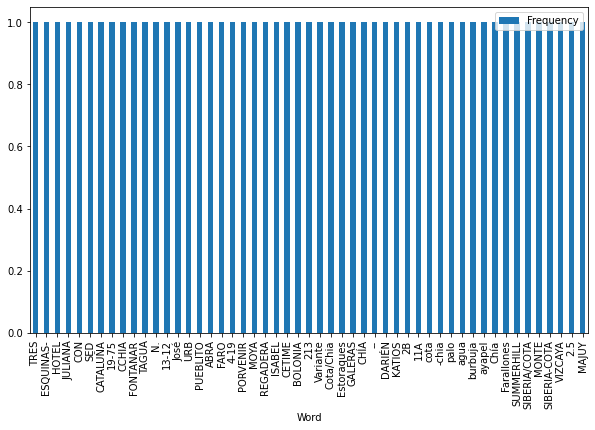

In [ ]:
# finding the 50 least frequent words in DIRECCION:
top_50_least_frequent = pd.DataFrame(word_dist.most_common()[-51:], columns=['Word', 'Frequency'])
top_50_least_frequent.plot(kind='bar', x = 'Word', figsize = (10,6))

In [ ]:
# DIRECCION lowering case:
df['Direccion_Clean'] = df['DIRECCION'].str.lower()
# cleaning DIRECCION values:
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('.', ' ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('clle  15 a norte # 1 -128 porto ', 'conjunto forte ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('craeciente', 'creciente', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('craeciente ', 'creciente ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('10110 ', '101 10 ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('o5 ', '05 ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('8 401 ', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('á ', 'a ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace(' no ', ' # ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace(' n ', ' # ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace(' cainos ', ' caminos ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('//').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('media').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' 1/2 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' pm ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' con ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' sed. ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' entrada ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' lote ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace(' paradero', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('r:', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace(':', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace(',', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('-', ' ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('_', ' ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('/', ' ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('(', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('c4', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('p1', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' rg ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' i#t ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' in ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t1 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t2 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t4 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t5 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t6 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t10 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' t11 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' to ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' to2 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('torre ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('torres ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('torre1 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('torre7 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('toore ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('bl ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' blo ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('bloq ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('bloque ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('edif ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('quintas ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('int ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('int1 ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('interior ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('piso').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('apartamento ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('apto ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('apt ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('ap ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('ap301').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('uni ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' ur ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' urb ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' et ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' etapa ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' fase').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' timbre ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('portal ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' parcela ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('mz ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('manzana ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('maz ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('mnz ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' casa').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('cas ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('cada ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split('cs ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' ca ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.split(' bolivia ').str[0]
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('rc:cra ', 'carrera ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('amcra ', 'carrera ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('am ', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('clle ', 'calle ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('cll ', 'calle ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('cra ', 'carrera ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('cr ', 'carrera ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('dg ', 'diagonal ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('trv ', 'transversal ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('tr ', 'transversal ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('tv ', 'transversal ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('av ', 'avenida ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('km ', 'kilometro ', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('k1 ', 'kilometro 1', regex=True)


# removing double and triple spaces:
df = df.replace('   ', ' ', regex=True)
df = df.replace('  ', ' ', regex=True)

In [ ]:
# fixing some addresses
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('cota vereda la moya ', '', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('cota condominio palo e monte ', 'conjunto eesidencial palo e monte', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('summer hill', 'condominio residencial summer hill', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace('summerhill', 'condominio residencial summer hill', regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace("carrera 70 g # 78 a 88 d carrera 70 g # 72 54", "carrera 70 g # 78 a 88 d", regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace("calle 113 # 78 73 d calle 83 a # 114 99", "calle 113 # 78 73 d", regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace("carrera 113 # 83 a 42 b 6", "carrera 113 # 83 a 42", regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace("carrera 112 c # 78 d 05 d carrera 111 a # 76 38", "carrera 112 c # 78 d 05", regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace("163 # 62 95 carrera 14 b # 161 54", "163 # 62 95", regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace("carrera 101 a # 135 10 d carrera 101 b # 137 14", "carrera 101 a # 135 10", regex=True)
df['Direccion_Clean'] = df['Direccion_Clean'].str.replace("carrera 82a # 6 16 transversal 4", "carrera 82a # 6 16", regex=True)



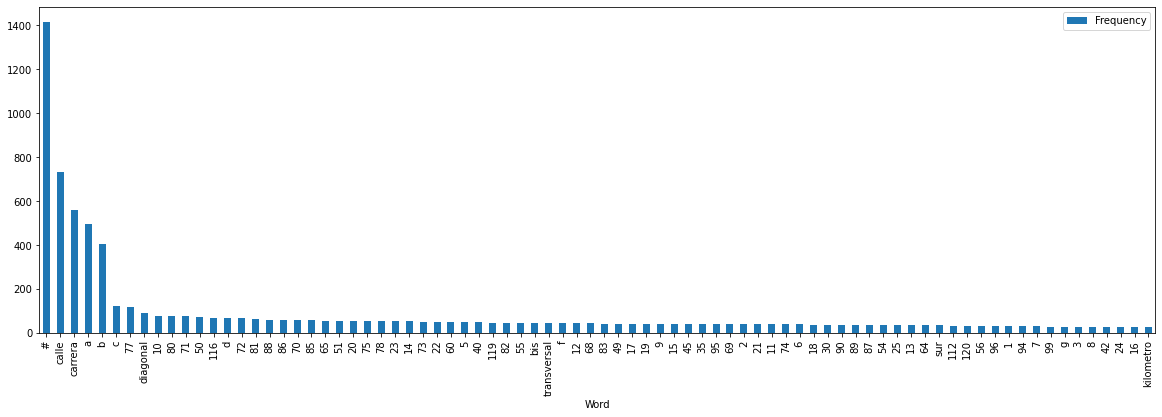

In [ ]:
# finding the 80 most frequent words in Direccion_Clean:
a = df['Direccion_Clean'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
top_80_most_frequent = pd.DataFrame(word_dist.most_common()[:80],columns=['Word', 'Frequency'])
top_80_most_frequent.plot(kind='bar', x = 'Word', figsize = (20,6))

In [ ]:
# finding the 80 least frequent words in Direccion_Clean:
words_frequency = pd.DataFrame(word_dist.most_common(), columns=['Word', 'Frequency'])
words_frequency.to_excel("words_frequency_con_direcciones_limpias.xlsx")

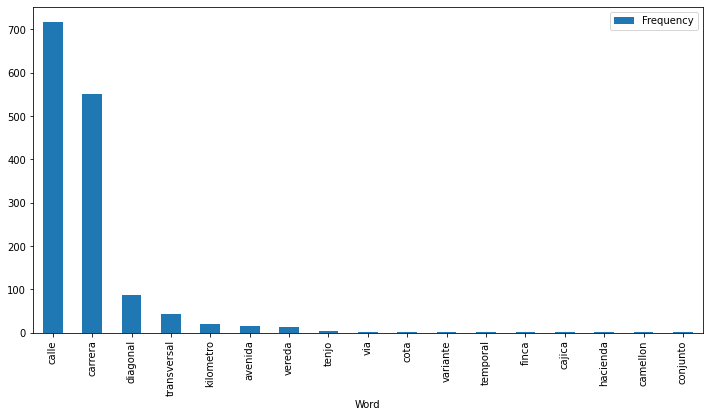

In [ ]:
# most frequent first words:
df['direccion_first_word'] = df['Direccion_Clean'].str.split(' ').str[0]
a = df['direccion_first_word'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
most_frequent_first = pd.DataFrame(word_dist.most_common()[:70],columns=['Word', 'Frequency'])
most_frequent_first.plot(kind='bar', x = 'Word', figsize = (12,6))

In [ ]:
# creating a new column to look for coordenates:
df['Direccion_final'] = df['Direccion_Clean'].astype(str) + ' ' + df['CIUDAD'].astype(str) + ' Colombia'

In [ ]:
# naming the marker:
df['Marker'] = df['ESTUDIANTE'].astype(str) + ' ' + df['Direccion_Clean'].astype(str)

In [ ]:
# number of unique addresses
len(df.Direccion_Clean), len(df.Direccion_Clean.unique())

(1469, 1063)

In [ ]:
# removing double and triple spaces:
df = df.replace('   ', ' ', regex=True)
df = df.replace('  ', ' ', regex=True)
# ordering df by RUTA number:
df = df.sort_values(by='Direccion_Clean', ascending=True)
df = df.sort_values(by='RUTA', ascending=True)

# Getting coordinates:

In [ ]:
latitudes = []
longitudes = []
residence = df["Direccion_final"].to_numpy()
for i in residence:
  direccion = i
  params = {'key':API_KEY, 
          'address': direccion}
  response = requests.get(base_url, params = params)
  #response.json()
  try:
    latitud = response.json()['results'][0]['geometry']['location']['lat']
    longitud = response.json()['results'][0]['geometry']['location']['lng']
    #print(i, latitud, longitud)
    latitudes.append(latitud)
    longitudes.append(longitud)
  except:
    print(i + " not found")
    latitudes.append('not found')
    longitudes.append('not found')

# adding coordenates to dataframe:
df['latitudes'] = latitudes
df['longitudes'] = longitudes
df['coordenadas']= list(zip(df.latitudes, df.longitudes))
dict_of_locations = pd.Series(df.coordenadas.values,index=df.ESTUDIANTE).to_dict()

calle 10 # 14 a 85 sur sol creciente Mosquera Colombia not found
kilometro 4 via cajica zipaquira bosque residencial alcaparros CAJICA Colombia not found
carrera 2 a # 2 46 CHIA Colombia not found
calle 1 # 5 15 CHIA Colombia not found
calle 16 # 3 30 CHIA Colombia not found


In [ ]:
len(df['coordenadas'].value_counts()), len(df)

(924, 1469)

# Saving output:

In [ ]:
df.drop('direccion_first_word', axis = 1, inplace=True)
df.to_excel("Base_de_datos_con_direcciones_limpias.xlsx")

# Maps:

In [ ]:
fig = px.scatter_mapbox(df[df['latitudes'] != 'not found'], lat="latitudes", hover_data=['ESTUDIANTE','Direccion_final'], lon="longitudes", zoom=13)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# Setting up Map:
STS = [4.710664, -74.124992]
mapa_de_ruta = folium.Map(location=STS, zoom_start=10, tiles='OpenStreetMap')
df_2 = df[df['latitudes'] != 'not found']
dict_of_locations2 = pd.Series(df_2.coordenadas.values,index=df_2.ESTUDIANTE).to_dict()
# Adding locations to Map:
for i in dict_of_locations2:
  folium.Marker(location = dict_of_locations2[i], tooltip=i).add_to(mapa_de_ruta)
mapa_de_ruta

#Detail:

In [ ]:
# separating dataframes by Num_Ruta:
dict_of_rutas = dict(iter(df.groupby('Num_Ruta')))

In [ ]:
datos_para_rutas = ['Direccion_final','ESTUDIANTE','coordenadas']